# Libraries


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# DataSet


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/MachineLearningCSV.md5
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None # Čita sve redove, moguće je pročitati samo određeni broj

df1 = pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/kaggle/input/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
df = pd.DataFrame()

df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Exploratory Analysis

In [ ]:
nRow, nCol = df.shape
print(f'This Dataset has {nRow} rows and {nCol} columns')

This Dataset has 2830743 rows and 79 columns


In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,230769.2308,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,352941.1765,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
for i, col in enumerate(df.columns):
    print(i, col)

0  Destination Port
1  Flow Duration
2  Total Fwd Packets
3  Total Backward Packets
4 Total Length of Fwd Packets
5  Total Length of Bwd Packets
6  Fwd Packet Length Max
7  Fwd Packet Length Min
8  Fwd Packet Length Mean
9  Fwd Packet Length Std
10 Bwd Packet Length Max
11  Bwd Packet Length Min
12  Bwd Packet Length Mean
13  Bwd Packet Length Std
14 Flow Bytes/s
15  Flow Packets/s
16  Flow IAT Mean
17  Flow IAT Std
18  Flow IAT Max
19  Flow IAT Min
20 Fwd IAT Total
21  Fwd IAT Mean
22  Fwd IAT Std
23  Fwd IAT Max
24  Fwd IAT Min
25 Bwd IAT Total
26  Bwd IAT Mean
27  Bwd IAT Std
28  Bwd IAT Max
29  Bwd IAT Min
30 Fwd PSH Flags
31  Bwd PSH Flags
32  Fwd URG Flags
33  Bwd URG Flags
34  Fwd Header Length
35  Bwd Header Length
36 Fwd Packets/s
37  Bwd Packets/s
38  Min Packet Length
39  Max Packet Length
40  Packet Length Mean
41  Packet Length Std
42  Packet Length Variance
43 FIN Flag Count
44  SYN Flag Count
45  RST Flag Count
46  PSH Flag Count
47  ACK Flag Count
48  URG Flag Count
49 

In [ ]:
#Split dataset on train and test
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()

# Packet Attack Distribution
train[' Label'].value_counts()
test[' Label'].value_counts()

BENIGN                        682092
DoS Hulk                       69066
PortScan                       47841
DDoS                           38346
DoS GoldenEye                   3041
FTP-Patator                     2359
SSH-Patator                     1786
DoS slowloris                   1764
DoS Slowhttptest                1649
Bot                              580
Web Attack � Brute Force         465
Web Attack � XSS                 203
Infiltration                      21
Web Attack � Sql Injection         8
Heartbleed                         2
Name:  Label, dtype: int64

# Classification

### Data preprocess

In [ ]:
#Scalling numerical attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train[' Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [ ]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

### Features Selection with Feature Importance Calculation by RFC

In [ ]:
#we can verify our results by of important features by using following function
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel #selection function already made by library
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100,n_jobs=-1))#applying forest classification
selector.fit(train_X, train_y) 



SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
    

In [ ]:
selected_feat= train_X.columns[(selector.get_support())]#extracing the important features
print(selected_feat)
print(type(selected_feat))

Index([' Destination Port', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Mean', 'Bwd Packet Length Max',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       ' Fwd Header Length', ' Bwd Header Length', ' Max Packet Length',
       ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       ' Fwd Header Length.1', ' Subflow Fwd Bytes', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [ ]:
import itertools
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(selector.get_support(), train_X.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
a = [i[0] for i in feature_map]
train_X = train_X.iloc[:,a]
test_X = test_X.iloc[:,a]

# Decision Tree Classifier Model

In [ ]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

#Fitting Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### Training Results

In [ ]:
#Evaluate Models
from sklearn import metrics


scores = cross_val_score(DTC_Classifier, X_train, Y_train, cv=10)
accuracy = metrics.accuracy_score(Y_train,DTC_Classifier.predict(X_train))
classification_report_tree = metrics.classification_report(Y_train, DTC_Classifier.predict(X_train))
print()
print('============================== {} Model Evaluation =============================='.format(i))
print()
print ("Cross Validation Mean Score:" "\n", scores.mean())
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Classification report:" "\n", classification_report_tree) 
print()


============================== 78 Model Evaluation ==============================

Cross Validation Mean Score:
 0.9983165882041881

Model Accuracy:
 0.9984651032684865

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273562
         1.0       1.00      1.00      1.00   1113502

    accuracy                           1.00   1387064
   macro avg       1.00      1.00      1.00   1387064
weighted avg       1.00      1.00      1.00   1387064




Text(48.5, 0.5, 'Predicted labels')

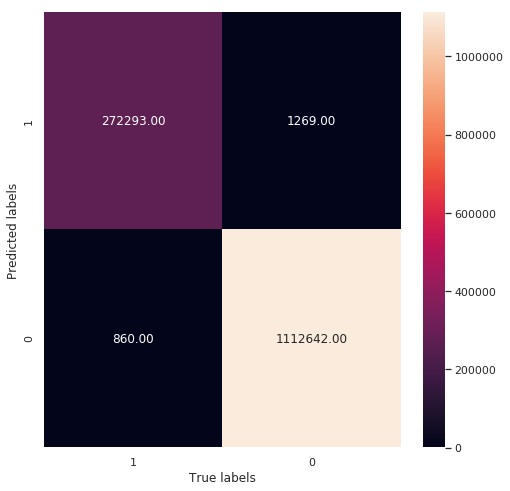

In [ ]:
import seaborn as sn

confusion_matrix = metrics.confusion_matrix(Y_train, DTC_Classifier.predict(X_train))
sn.heatmap(confusion_matrix, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

#sn.set(rc={'figure.figsize':(8,8)})

### Testing Results

In [ ]:
accuracy = metrics.accuracy_score(Y_test, DTC_Classifier.predict(X_test))
classification = metrics.classification_report(Y_test, DTC_Classifier.predict(X_test))
print()
print('============================== {} Model Test Results =============================='.format(i))
print()
print ("Model Accuracy:" "\n", accuracy)
print()
print("Classification report:" "\n", classification)
print()        


============================== 78 Model Test Results ==============================

Model Accuracy:
 0.9982959209764894

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    116953
         1.0       1.00      1.00      1.00    477503

    accuracy                           1.00    594456
   macro avg       1.00      1.00      1.00    594456
weighted avg       1.00      1.00      1.00    594456




Text(48.5, 0.5, 'Predicted labels')

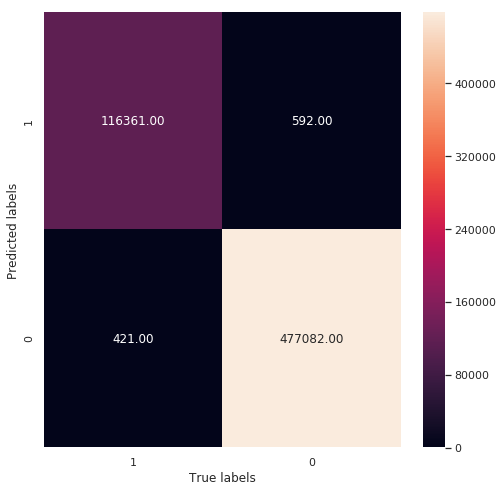

In [ ]:
confusion_matrix = metrics.confusion_matrix(Y_test, DTC_Classifier.predict(X_test))
sn.heatmap(confusion_matrix, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

#sn.set(rc={'figure.figsize':(8,8)})

In [ ]:
import pickle

pickle.dump(DTC_Classifier, open("CIC_ML_DT.pkl", "wb"))